In [1]:
import pandas as pd

df = pd.read_csv("RKI_COVID19.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316762 entries, 0 to 1316761
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   ObjectId              1316762 non-null  int64 
 1   IdBundesland          1316762 non-null  int64 
 2   Bundesland            1316762 non-null  object
 3   Landkreis             1316762 non-null  object
 4   Altersgruppe          1316762 non-null  object
 5   Geschlecht            1316762 non-null  object
 6   AnzahlFall            1316762 non-null  int64 
 7   AnzahlTodesfall       1316762 non-null  int64 
 8   Meldedatum            1316762 non-null  object
 9   IdLandkreis           1316762 non-null  int64 
 10  Datenstand            1316762 non-null  object
 11  NeuerFall             1316762 non-null  int64 
 12  NeuerTodesfall        1316762 non-null  int64 
 13  Refdatum              1316762 non-null  object
 14  NeuGenesen            1316762 non-null  int64 
 15

In [3]:
df.drop(columns=['ObjectId', 'Altersgruppe2', 'Datenstand', 'IstErkrankungsbeginn', 'IdLandkreis', 'AnzahlGenesen', 'IdBundesland', 'Landkreis', 'Altersgruppe', 'Refdatum', 'NeuGenesen', 'AnzahlGenesen'])

,Bundesland,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,NeuerFall,NeuerTodesfall
0,Schleswig-Holstein,M,1,0,2020/09/30 00:00:00+00,0,-9
1,Schleswig-Holstein,M,1,0,2020/10/29 00:00:00+00,0,-9
2,Schleswig-Holstein,M,1,0,2020/11/03 00:00:00+00,0,-9
3,Schleswig-Holstein,M,1,0,2020/11/20 00:00:00+00,0,-9
4,Schleswig-Holstein,M,1,0,2020/11/23 00:00:00+00,0,-9
...,...,...,...,...,...,...,...
1316757,Thüringen,M,1,0,2020/08/25 00:00:00+00,0,-9
1316758,Thüringen,M,1,0,2020/10/09 00:00:00+00,0,-9
1316759,Thüringen,M,1,0,2020/10/12 00:00:00+00,0,-9
1316760,Thüringen,M,1,0,2020/10/12 00:00:00+00,0,-9


In [4]:
df['AnzahlFall'].sum()

2442237

In [5]:
df['Meldedatum'] = pd.to_datetime(df['Meldedatum'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316762 entries, 0 to 1316761
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   ObjectId              1316762 non-null  int64              
 1   IdBundesland          1316762 non-null  int64              
 2   Bundesland            1316762 non-null  object             
 3   Landkreis             1316762 non-null  object             
 4   Altersgruppe          1316762 non-null  object             
 5   Geschlecht            1316762 non-null  object             
 6   AnzahlFall            1316762 non-null  int64              
 7   AnzahlTodesfall       1316762 non-null  int64              
 8   Meldedatum            1316762 non-null  datetime64[ns, UTC]
 9   IdLandkreis           1316762 non-null  int64              
 10  Datenstand            1316762 non-null  object             
 11  NeuerFall             1316762 non-nul

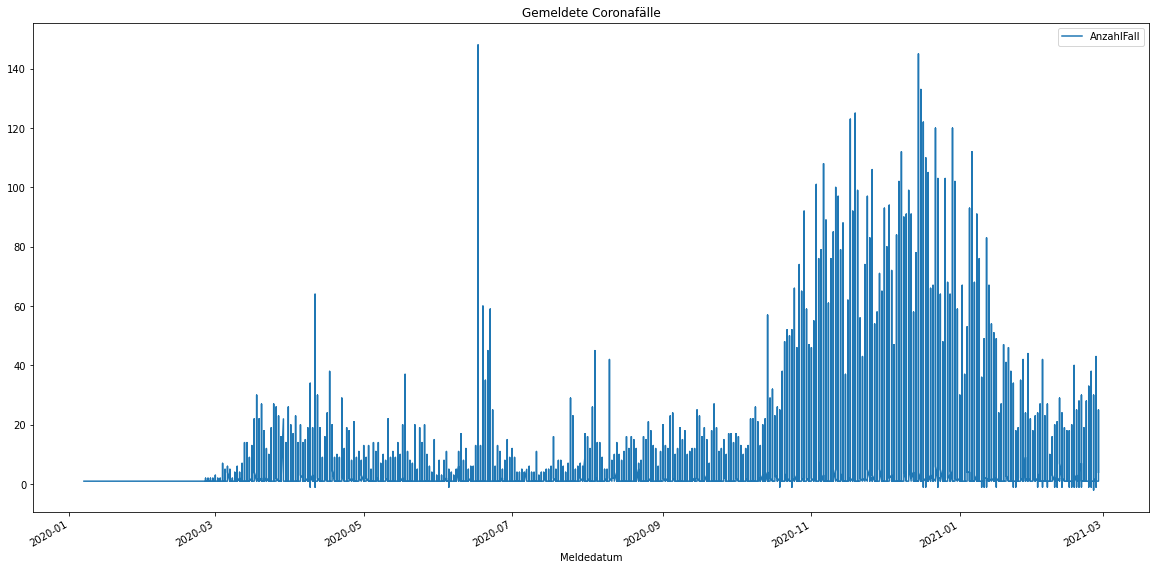

In [7]:
# Plot Anzahl Coronafälle
# Quelle: RKI

df.plot(x= 'Meldedatum', y= 'AnzahlFall', figsize=(20,10), title= 'Gemeldete Coronafälle');

In [7]:
# define subset for November
df['month'] = pd.to_datetime(df['Meldedatum']).dt.month
df_November = df.query('month == 11')
df_November.info()
df_November.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253086 entries, 2 to 1316633
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   ObjectId              253086 non-null  int64              
 1   IdBundesland          253086 non-null  int64              
 2   Bundesland            253086 non-null  object             
 3   Landkreis             253086 non-null  object             
 4   Altersgruppe          253086 non-null  object             
 5   Geschlecht            253086 non-null  object             
 6   AnzahlFall            253086 non-null  int64              
 7   AnzahlTodesfall       253086 non-null  int64              
 8   Meldedatum            253086 non-null  datetime64[ns, UTC]
 9   IdLandkreis           253086 non-null  int64              
 10  Datenstand            253086 non-null  object             
 11  NeuerFall             253086 non-null  int64       

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2,month
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-03 00:00:00+00:00,1001,"28.02.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00+00,0,1,0,Nicht übermittelt,11
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-20 00:00:00+00:00,1001,"28.02.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00+00,0,1,1,Nicht übermittelt,11
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-23 00:00:00+00:00,1001,"28.02.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00+00,0,1,1,Nicht übermittelt,11
27,28,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-11-10 00:00:00+00:00,1001,"28.02.2021, 00:00 Uhr",0,-9,2020/11/05 00:00:00+00,0,1,1,Nicht übermittelt,11
49,50,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-11-12 00:00:00+00:00,1001,"28.02.2021, 00:00 Uhr",0,-9,2020/11/12 00:00:00+00,0,1,0,Nicht übermittelt,11


<AxesSubplot:title={'center':'Gemeldete Coronafälle'}>

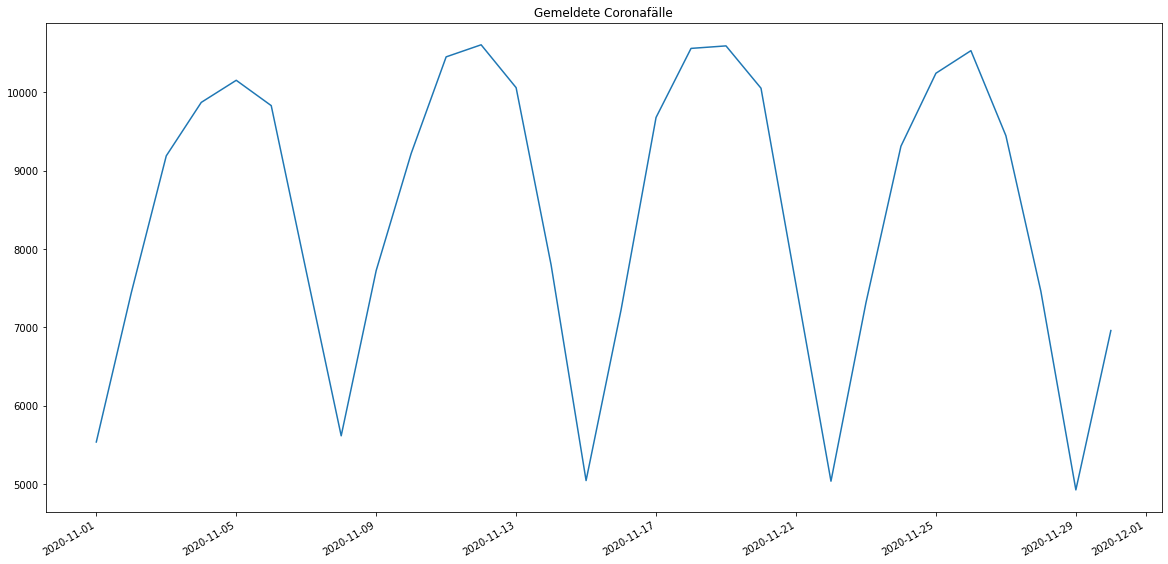

In [13]:
# plot November
%matplotlib inline
df_November['Meldedatum'].value_counts().plot.line(x= 'Meldedatum', y= 'AnzahlFall', figsize=(20,10), title= 'Gemeldete Coronafälle')

#df_November.plot.line(x= 'Meldedatum', y= 'AnzahlFall', figsize=(20,10), title= 'Gemeldete Coronafälle');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303993 entries, 5 to 1316686
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   ObjectId              303993 non-null  int64              
 1   IdBundesland          303993 non-null  int64              
 2   Bundesland            303993 non-null  object             
 3   Landkreis             303993 non-null  object             
 4   Altersgruppe          303993 non-null  object             
 5   Geschlecht            303993 non-null  object             
 6   AnzahlFall            303993 non-null  int64              
 7   AnzahlTodesfall       303993 non-null  int64              
 8   Meldedatum            303993 non-null  datetime64[ns, UTC]
 9   IdLandkreis           303993 non-null  int64              
 10  Datenstand            303993 non-null  object             
 11  NeuerFall             303993 non-null  int64       

<AxesSubplot:title={'center':'Gemeldete Coronafälle'}>

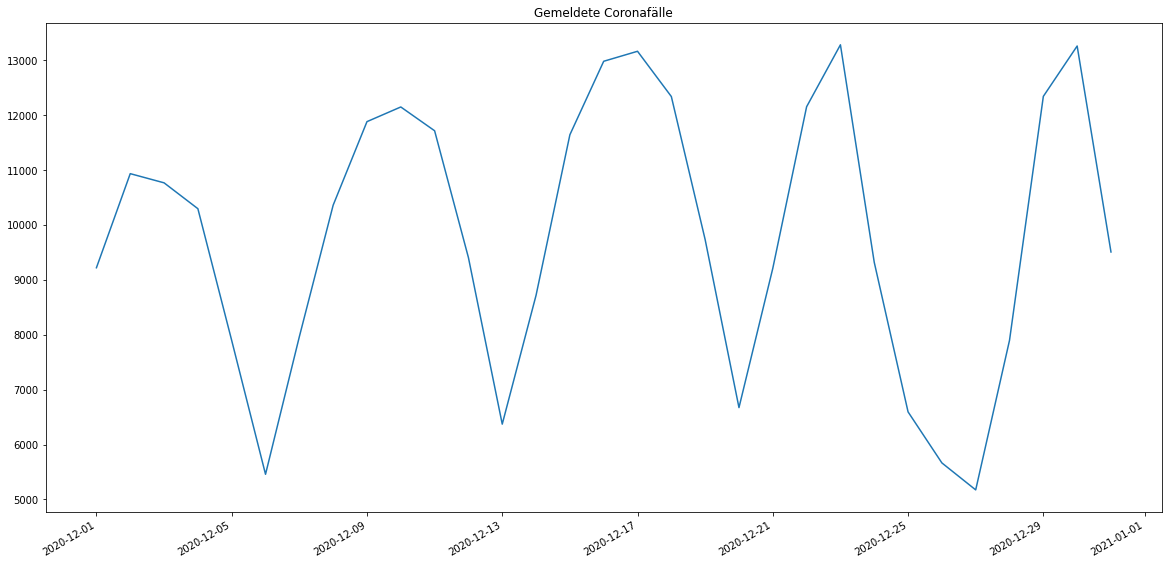

In [14]:
# define subset for DEcember
df_Dezember = df.query('month == 12')
df_Dezember.info()
df_Dezember.head()

df_Dezember['Meldedatum'].value_counts().plot.line(x= 'Meldedatum', y= 'AnzahlFall', figsize=(20,10), title= 'Gemeldete Coronafälle')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243197 entries, 6 to 1316721
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   ObjectId              243197 non-null  int64              
 1   IdBundesland          243197 non-null  int64              
 2   Bundesland            243197 non-null  object             
 3   Landkreis             243197 non-null  object             
 4   Altersgruppe          243197 non-null  object             
 5   Geschlecht            243197 non-null  object             
 6   AnzahlFall            243197 non-null  int64              
 7   AnzahlTodesfall       243197 non-null  int64              
 8   Meldedatum            243197 non-null  datetime64[ns, UTC]
 9   IdLandkreis           243197 non-null  int64              
 10  Datenstand            243197 non-null  object             
 11  NeuerFall             243197 non-null  int64       

<AxesSubplot:title={'center':'Gemeldete Coronafälle'}>

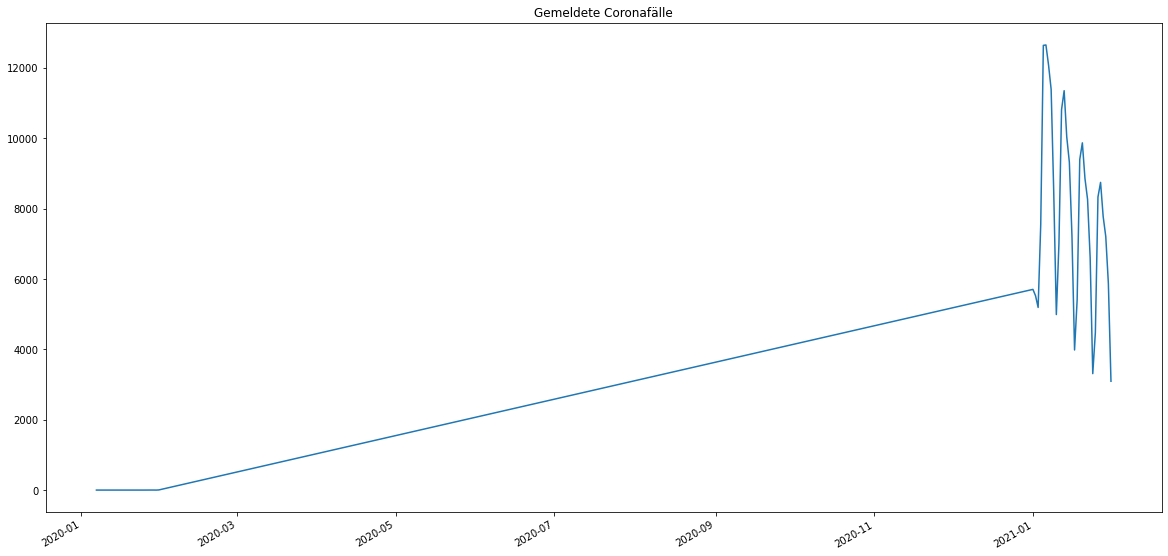

In [17]:
# define subset for Januar
df_Januar = df.query('month == 1')
df_Januar.info()
df_Januar.head()

df_Januar['Meldedatum'].value_counts().plot.line(x= 'Meldedatum', y= 'AnzahlFall', figsize=(20,10), title= 'Gemeldete Coronafälle')